In [26]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 Let create a sine wave

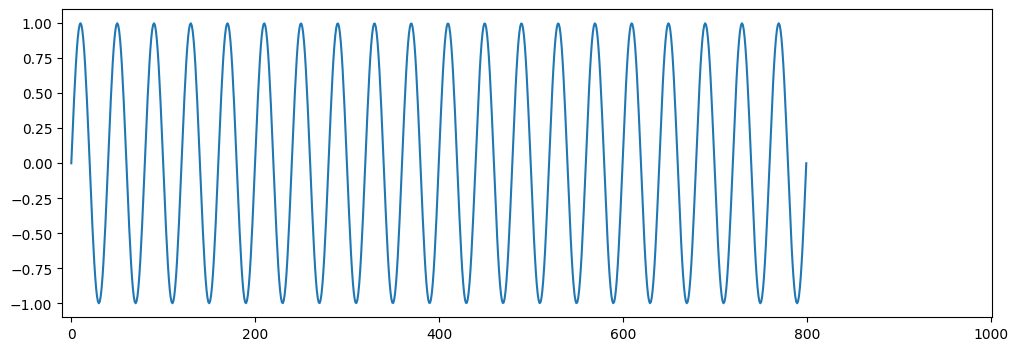

In [27]:
# t = range(800)
# t = torch.linspace(0,799,steps = 800)
# y = torch.sin(2*torch.pi * t / 40)
t = torch.linspace(0,800,steps=800)
y = torch.sin(t*2*3.1416/40)
plt.figure(figsize=(12,4))
plt.xlim(-10,1001)
plt.plot(y.numpy());


In [28]:
y[0] # this is X1 we talking about

tensor(0.)

In [29]:
y.shape

# (800,1,1)

torch.Size([800])

In [30]:
#example of time series with two features
'''
Country: Thailand
     egg price    gold price    oil price
t0
t1
t2
t3

Country: Nepal
Country: Vietnam
'''

'''
Stock: Apple
       close price open price
t0
t1
t2

Stock: Google
'''

'\nStock: Apple\n       close price open price\nt0\nt1\nt2\n\nStock: Google\n'

In [31]:
test_size = 40

train_set = y[:-test_size]
test_set = y[-test_size:]

In [32]:
# we want to create real sample
# maybe we want to use 5 data before to predict the next 3
# we call 5 as window size, and 3 as the label size

def input_data(seq,ws,labelsize = 1):
    out =[]
    total_length = len(seq)
    for i in range(total_length - ws):
        window  = seq[i:i+ws]
        label = seq[i+ws:i+ws+labelsize]
        out.append((window,label))
    return out

In [33]:
window_size = 40

train_data = input_data(train_set,window_size)
print(len(train_data))

720


In [34]:
train_data[0]

(tensor([ 0.0000,  0.1566,  0.3094,  0.4545,  0.5884,  0.7078,  0.8097,  0.8916,
          0.9515,  0.9880,  1.0000,  0.9873,  0.9503,  0.8898,  0.8074,  0.7050,
          0.5852,  0.4510,  0.3056,  0.1527, -0.0039, -0.1605, -0.3131, -0.4580,
         -0.5916, -0.7106, -0.8120, -0.8934, -0.9527, -0.9886, -1.0000, -0.9867,
         -0.9491, -0.8880, -0.8051, -0.7022, -0.5820, -0.4475, -0.3019, -0.1488]),
 tensor([0.0079]))

In [35]:
torch.set_printoptions(sci_mode=False)
sam = train_data[0][0]
tar = train_data[0][1]
sam,tar

(tensor([ 0.0000,  0.1566,  0.3094,  0.4545,  0.5884,  0.7078,  0.8097,  0.8916,
          0.9515,  0.9880,  1.0000,  0.9873,  0.9503,  0.8898,  0.8074,  0.7050,
          0.5852,  0.4510,  0.3056,  0.1527, -0.0039, -0.1605, -0.3131, -0.4580,
         -0.5916, -0.7106, -0.8120, -0.8934, -0.9527, -0.9886, -1.0000, -0.9867,
         -0.9491, -0.8880, -0.8051, -0.7022, -0.5820, -0.4475, -0.3019, -0.1488]),
 tensor([0.0079]))

# 2. Let's create a LSTM model
LSTM is basically RNN which addresses long-term dependencies

In [36]:
input_size  = 1  #same as input features
hidden_size = 50 #same as output features
lstm = nn.LSTM(input_size, hidden_size)

In [37]:
seq, target = train_data[0]

In [38]:
seq.shape

torch.Size([40])

In [39]:
seq = seq.reshape(len(seq),1,-1)
seq.shape

torch.Size([40, 1, 1])

In [41]:
out ,(hn,cn)= lstm(seq)
print(out.shape)
print(hn.shape)

torch.Size([40, 1, 50])
torch.Size([1, 1, 50])


In [45]:
torch.set_printoptions(sci_mode=False)

print(out[-1,:,:])
print(hn)

tensor([[-0.0448,  0.0313, -0.0869, -0.0650, -0.0066, -0.0558, -0.0624,  0.1067,
          0.0386,  0.0747, -0.0624, -0.1204, -0.0389,  0.0033,  0.1153,  0.0201,
         -0.0425,  0.0799,  0.0360, -0.1192,  0.1031, -0.0170,  0.0526, -0.0187,
          0.0637, -0.0557,  0.0859, -0.0160, -0.0083,  0.1003, -0.0042, -0.0026,
          0.0677,  0.0069, -0.0609,  0.0296, -0.1096, -0.0566,  0.0856,  0.0644,
          0.0349, -0.0032, -0.0290,  0.1050,  0.0823,  0.0182,  0.0036,  0.0479,
          0.0894, -0.0405]], grad_fn=<SliceBackward0>)
tensor([[[-0.0448,  0.0313, -0.0869, -0.0650, -0.0066, -0.0558, -0.0624,
           0.1067,  0.0386,  0.0747, -0.0624, -0.1204, -0.0389,  0.0033,
           0.1153,  0.0201, -0.0425,  0.0799,  0.0360, -0.1192,  0.1031,
          -0.0170,  0.0526, -0.0187,  0.0637, -0.0557,  0.0859, -0.0160,
          -0.0083,  0.1003, -0.0042, -0.0026,  0.0677,  0.0069, -0.0609,
           0.0296, -0.1096, -0.0566,  0.0856,  0.0644,  0.0349, -0.0032,
          -0.0290,  0

In [46]:
lstm2 = nn.LSTM(input_size, hidden_size, num_layers=2)

In [47]:
out ,(hn,cn)= lstm2(seq)
print(out.shape)
print(hn.shape)

torch.Size([40, 1, 50])
torch.Size([2, 1, 50])


In [49]:
torch.set_printoptions(sci_mode=False)

print(out[-1,:,:])
print(hn[0])
print(hn[1])

tensor([[     0.0319,     -0.0174,     -0.1320,      0.0203,      0.0027,
              0.0081,     -0.0092,     -0.0497,      0.0001,      0.0756,
             -0.0141,      0.0074,      0.0612,      0.0342,      0.1027,
              0.0373,      0.0311,      0.0338,     -0.0113,     -0.0575,
             -0.0575,     -0.0256,      0.0204,      0.0185,     -0.0368,
             -0.1692,     -0.0301,      0.0947,      0.0516,     -0.0276,
             -0.0809,      0.0857,     -0.0143,     -0.0993,      0.0020,
             -0.0441,     -0.0385,     -0.0391,     -0.0223,     -0.0093,
             -0.0065,     -0.0303,     -0.0700,      0.0844,      0.0171,
             -0.0457,     -0.0729,     -0.1020,      0.0825,     -0.0284]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0197,  0.0838,  0.0392, -0.0277, -0.0226, -0.0245,  0.0009, -0.0574,
         -0.0455,  0.1161,  0.0404, -0.0576,  0.0974, -0.0298,  0.1244,  0.0349,
          0.1277,  0.0041,  0.0049, -0.0502, -0.1077, -0.0116, 

## 3. Design the neural network